# Fit Varshni dei picchi QD

In [75]:
from picchi import raccoglitore_2 # picchi reference
from varshni_subroutines import *

d_o_emi = ['emi=0', 'emi=0o5', 'emi=1', 'emi=1o5', 'emi=2', 'emi=2o5', 'emi=3']#, '3o5']
d_o_ass = ['ass=0', 'ass=1']
arr_temperatura = [15, 30, 45, 70, 100, 150]

### Estraggo i due picchi e il loro errore

In [76]:
# i picchi vengono raccolti in data
# la key [ass][emi] contiene:
# [0] - lista dei picchi sx
# [1] - lista degli errori sui picchi sx
# [2] - lista dei picchi dx
# [3] - lista degli errori sui picchi dx

data = {}

In [77]:
for ass in d_o_ass:
    
    data[ass] = {}
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        data[ass][emi] = []
        arr_picchi_sx  = []
        arr_err_picchi_sx  = []
        arr_picchi_dx  = []
        arr_err_picchi_dx  = []
        
        # Ciclo sulla temperatura
        for i in range(len(arr_temperatura)):
            
            # ----------------------------------
             # la regione di sx richiede attenzione particolare:
            # può capitare che ci sia un picco fittizio tra sx1 e sx2
            # può capitare anche che ci sia solo il picco sx2
            if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 1:
                if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][0][0] < 800:
                    picco_sx_1 = 0
                    picco_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
                else:
                    picco_sx_1 = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
                    picco_sx_2 = 0 
            
            elif len(raccoglitore_2[ass][emi][i]['Regione 1']) > 1:
                picco_sx_1 = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
                # se sono tre allora c'è sicuramente il pezzotto in mezzo
                if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 3:
                    picco_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][2][0]
                # se sono due si deve verificare che il secondo sia nel posto giusto
                elif len(raccoglitore_2[ass][emi][i]['Regione 1']) == 2:
                    if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][1][0] < 800:
                        picco_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][1][0]
                    else:
                        picco_sx_2 = 0
            else:
                picco_sx_1 = 0
                picco_sx_2 = 0
                
                
            if len(raccoglitore_2[ass][emi][i]['Regione 2']) == 1:
                picco_dx_1 = raccoglitore_2[ass][emi][i]['Regione 2'][0][0]
                picco_dx_2 = 0
            elif len(raccoglitore_2[ass][emi][i]['Regione 2']) > 1:
                picco_dx_1 = raccoglitore_2[ass][emi][i]['Regione 2'][0][0]          
                picco_dx_2 = raccoglitore_2[ass][emi][i]['Regione 2'][1][0]
            else:
                picco_dx_1 = 0
                picco_dx_2 = 0
            # ----------------------------------
            
            # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
            # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
            #err_picco_sx = err_lambda_to_E(picco_sx_1, 0.7508320802)
            #err_picco_dx = err_lambda_to_E(picco_dx_1, 0.7508320802)
            err_picco_sx_2 = err_lambda_to_E(picco_sx_2, 0.7508320802)
            err_picco_dx_2 = err_lambda_to_E(picco_dx_2, 0.7508320802)
            
            # conversione dei nm in eV dei picchi
            #picco_sx = lambda_to_E(picco_sx_1)
            #picco_dx = lambda_to_E(picco_dx_1)
            picco_sx_2 = lambda_to_E(picco_sx_2)
            picco_dx_2 = lambda_to_E(picco_dx_2)
            
            # liste provvisorie 
            arr_picchi_sx.append(picco_sx_2)
            arr_err_picchi_sx.append(err_picco_sx_2)
            arr_picchi_dx.append(picco_dx_2)
            arr_err_picchi_dx.append(err_picco_dx_2)    
            
        # riempimento del contenitore data    
        data[ass][emi].append(arr_picchi_sx)
        data[ass][emi].append(arr_err_picchi_sx)
        data[ass][emi].append(arr_picchi_dx)
        data[ass][emi].append(arr_err_picchi_dx)
                        

## Plot e fit

Per ciascuna key [ass][emi] l'obiettivo è plottare due curve su ciascun grafico, ognuna delle quali è associata a uno dei due picchi. Quidni per ogni intensità si ha 1 grafico con 2 curve, ciascuna fittata con Varshni

In [78]:
arr_e_0_sx, arr_e_0_dx = [], []
arr_err_e_0_sx, arr_err_e_0_dx = [], []

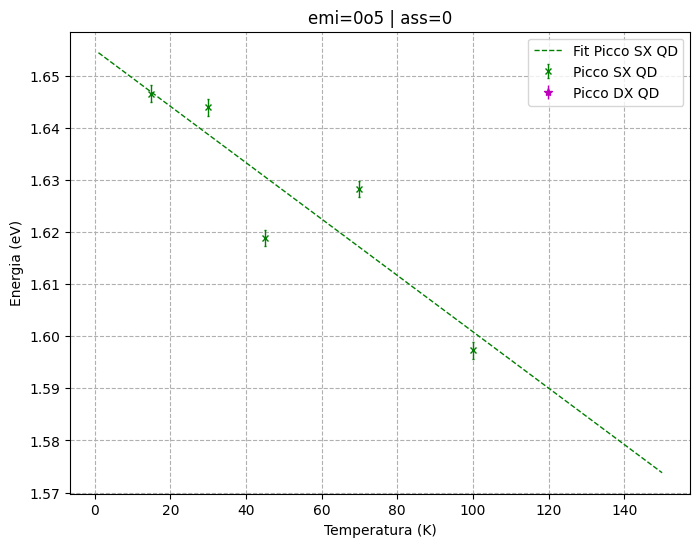

Parametri fit picco SX:
E_0 = 1.6549335556998437 ± 1.599887222069861 ; alpha = 0.0005408762231670758 ± 4.5529903367862805e-05 ; beta = 0.021346630528958334 ± 2965.4030889507985
• Chi quadro: 118.819
• Gradi di libertà: 2
• Chi quadro ridotto: 59.410
• p-value: 0.000e+00
Parametri fit picco DX:
E_0 = 1.49191639755235 ± 0.0029228369370454654 ; alpha = -7.809339991980235e-05 ± 0.00012756843520658808 ; beta = 0.8708087109058119 ± 1.9279351937358838e-07
• Chi quadro: 0.000
• Gradi di libertà: -3
• Chi quadro ridotto: -0.000
• p-value: nan


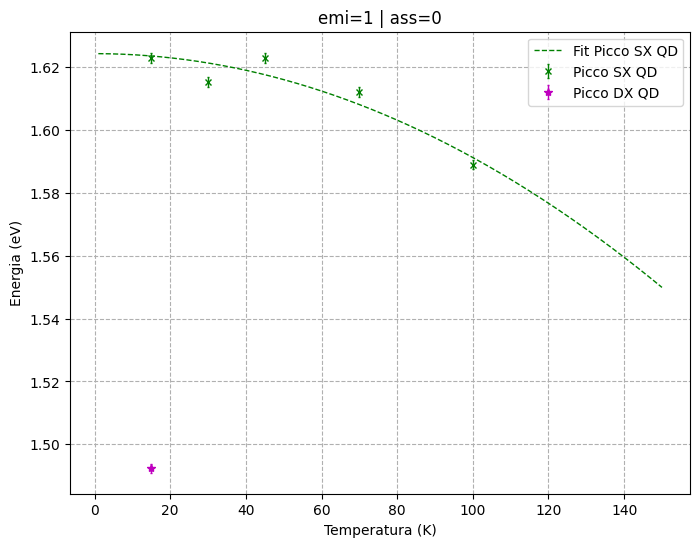

Parametri fit picco SX:
E_0 = 1.624275302249329 ± 0.0010078264626362829 ; alpha = 313.2629787409956 ± 18.394544676108353 ; beta = 94777808.23975001 ± 6.0798243970507435e-05
• Chi quadro: 34.472
• Gradi di libertà: 2
• Chi quadro ridotto: 17.236
• p-value: 3.270e-08
Parametri fit picco DX:
E_0 = 1.49191639755235 ± 0.0029228369370454654 ; alpha = -7.809339991980235e-05 ± 0.00012756843520658808 ; beta = 0.8708087109058119 ± 1.9279351937358838e-07
• Chi quadro: 0.286
• Gradi di libertà: -2
• Chi quadro ridotto: -0.143
• p-value: nan


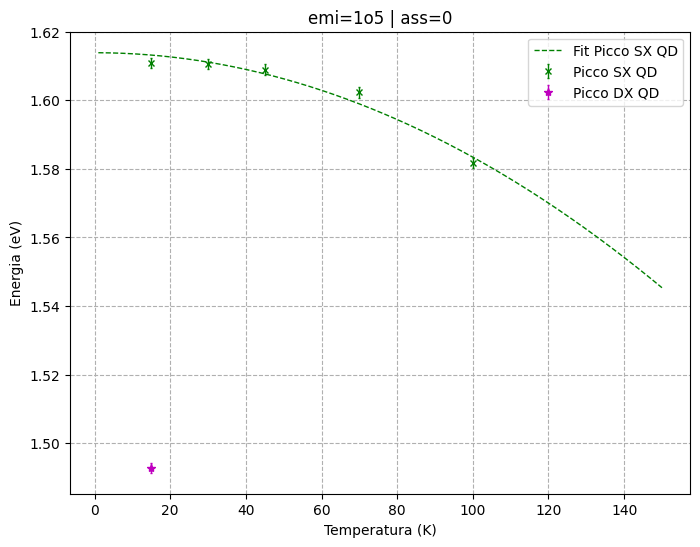

Parametri fit picco SX:
E_0 = 1.6139092238127097 ± 0.0009957818655744986 ; alpha = 55.20994533313704 ± 3.480158405689428 ; beta = 18114980.89010034 ± 1.0606601945499183e-05
• Chi quadro: 8.954
• Gradi di libertà: 2
• Chi quadro ridotto: 4.477
• p-value: 1.137e-02
Parametri fit picco DX:
E_0 = 1.49191639755235 ± 0.0029228369370454654 ; alpha = -7.809339991980235e-05 ± 0.00012756843520658808 ; beta = 0.8708087109058119 ± 1.9279351937358838e-07
• Chi quadro: 0.059
• Gradi di libertà: -2
• Chi quadro ridotto: -0.029
• p-value: nan


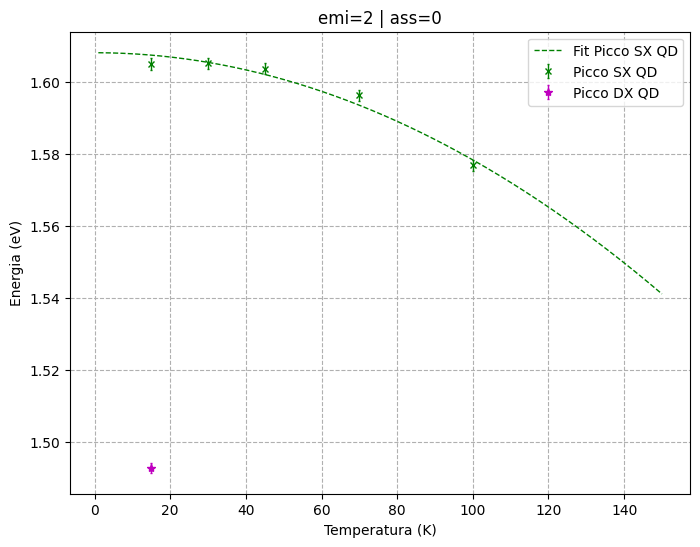

Parametri fit picco SX:
E_0 = 1.608072091178094 ± 0.0009887990185130815 ; alpha = 100.17455974011891 ± 6.426453170179647 ; beta = 33671317.55032977 ± 1.9119101460354886e-05
• Chi quadro: 7.780
• Gradi di libertà: 2
• Chi quadro ridotto: 3.890
• p-value: 2.045e-02
Parametri fit picco DX:
E_0 = 1.49191639755235 ± 0.0029228369370454654 ; alpha = -7.809339991980235e-05 ± 0.00012756843520658808 ; beta = 0.8708087109058119 ± 1.9279351937358838e-07
• Chi quadro: 0.012
• Gradi di libertà: -2
• Chi quadro ridotto: -0.006
• p-value: nan


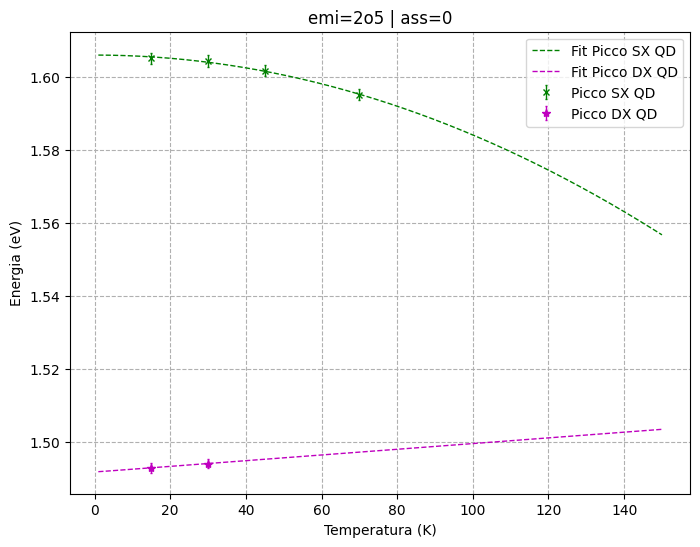

Parametri fit picco SX:
E_0 = 1.6060953067972081 ± 0.0014143296380325493 ; alpha = 7.842955848285826 ± 377619.1578820684 ; beta = 3582906.348470743 ± 172511745839.80606
• Chi quadro: 0.151
• Gradi di libertà: 1
• Chi quadro ridotto: 0.151
• p-value: 6.980e-01
Parametri fit picco DX:
E_0 = 1.49191639755235 ± 0.0029228369370454654 ; alpha = -7.809339991980235e-05 ± 0.00012756843520658808 ; beta = 0.8708087109058119 ± 1.9279351937358838e-07
• Chi quadro: 0.000
• Gradi di libertà: -1
• Chi quadro ridotto: -0.000
• p-value: nan


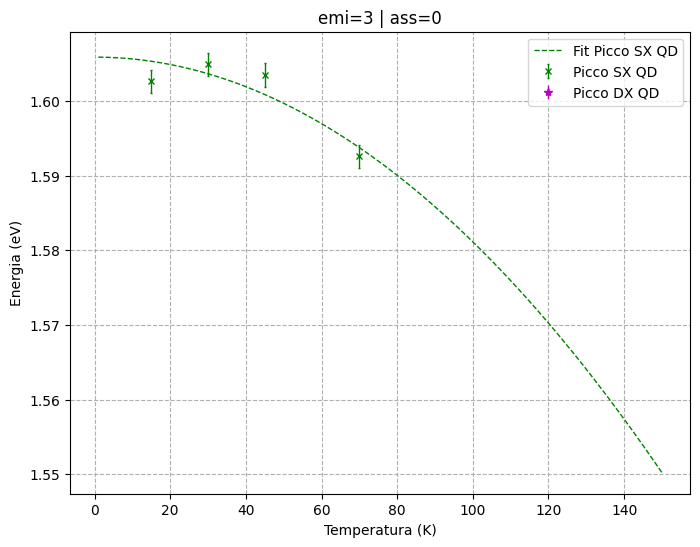

Parametri fit picco SX:
E_0 = 1.605866911011096 ± 0.0011714689564321524 ; alpha = 13.74770854084989 ± 2.399688483827671 ; beta = 5557128.14141939 ± 5.9364759575188235e-06
• Chi quadro: 6.984
• Gradi di libertà: 1
• Chi quadro ridotto: 6.984
• p-value: 8.223e-03
Parametri fit picco DX:
E_0 = 1.49191639755235 ± 0.0029228369370454654 ; alpha = -7.809339991980235e-05 ± 0.00012756843520658808 ; beta = 0.8708087109058119 ± 1.9279351937358838e-07
• Chi quadro: 0.000
• Gradi di libertà: -3
• Chi quadro ridotto: -0.000
• p-value: nan


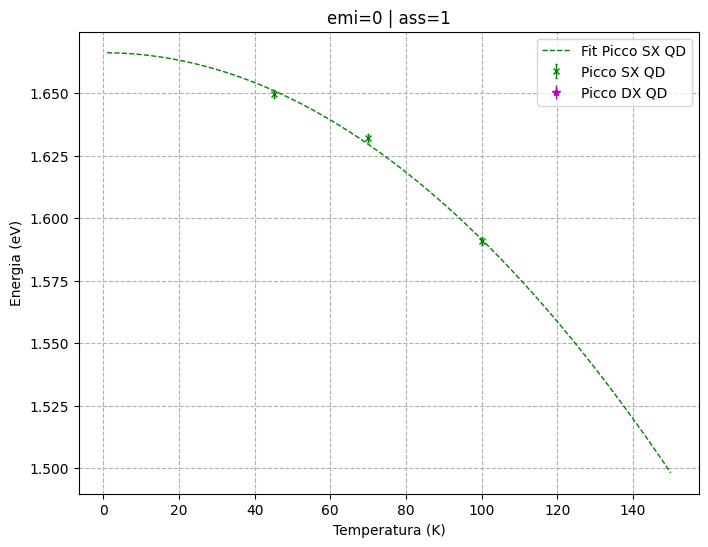

Parametri fit picco SX:
E_0 = 1.666123466906039 ± 0.0018604596533488094 ; alpha = 469.5602228387341 ± 17.402418546195246 ; beta = 62915628.955495715 ± 0.00012987979455177863
• Chi quadro: 3.186
• Gradi di libertà: 0
• Chi quadro ridotto: inf
• p-value: nan
Parametri fit picco DX:
E_0 = 1.49191639755235 ± 0.0029228369370454654 ; alpha = -7.809339991980235e-05 ± 0.00012756843520658808 ; beta = 0.8708087109058119 ± 1.9279351937358838e-07
• Chi quadro: 0.000
• Gradi di libertà: -3
• Chi quadro ridotto: -0.000
• p-value: nan


/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_85954/347596508.py:78: RuntimeWarning: divide by zero encountered in scalar divide
  chi2_ridotto1 = chi2_1 / gdl1


In [ ]:
for ass in d_o_ass:
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        # in ascissa va la temperatura
        x1 = arr_temperatura
        x2 = arr_temperatura
        
        # picco sx
        y1 = data[ass][emi][0]
        err_y1 = data[ass][emi][1]
        
        # picco dx
        y2 = data[ass][emi][2]
        err_y2 = data[ass][emi][3]
        
        # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
        x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
        y1 = [y_val for y_val in y1 if y_val != 0]
        err_y1 = [e_y_val for e_y_val in err_y1 if e_y_val != 0]
        
        x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
        y2 = [y_val for y_val in y2 if y_val != 0]
        err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]
        
        err_x = 1 # errore di 1 K sulla temperatura
        
        # Creazione del grafico
        x_fit = np.linspace(1, 150, 500)  # Creazione di un intervallo continuo per il grafico

        plt.figure(figsize=(8, 6))
        
        # Plot del primo picco (no fit)
        plt.errorbar(x1, y1, yerr=err_y1, fmt='gx', label='Picco SX QD', markersize=5, elinewidth=1, capsize=1)
        # Plot del secondo picco (no fit)
        plt.errorbar(x2, y2, yerr=err_y2, fmt='m*', label='Picco DX QD', markersize=6, elinewidth=1, capsize=1)
        
        if len(y1) > 1:
            # Fit del primo picco - Parametri iniziali?
            popt1, pcov1 = curve_fit(varshni, x1, y1, sigma=err_y1, absolute_sigma=True, p0=[x1[0], 3, 1], bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
            # Errori sui parametri
            perr1 = np.sqrt(np.diag(pcov1))  # Errori per il primo picco
            # plot del fit
            plt.plot(x_fit, varshni(x_fit, *popt1), 'g--', linewidth=1, label='Fit Picco SX QD')
            
        if len(y2) > 1:
            # Fit del secondo picco
            popt2, pcov2 = curve_fit(varshni, x2, y2, sigma=err_y2, absolute_sigma=True, p0=[x2[0], 3, 1], bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
            # Errori sui parametri
            perr2 = np.sqrt(np.diag(pcov2))  # Errori per il secondo picco
            # plot del fit
            plt.plot(x_fit, varshni(x_fit, *popt2), 'm--', linewidth=1, label='Fit Picco DX QD')
        

        # Aggiungere etichette e legenda
        plt.title(emi + ' | ' + ass)
        plt.xlabel('Temperatura (K)')
        plt.ylabel('Energia (eV)')
        plt.grid(linestyle='--')
        plt.legend()

        # Mostrare il grafico
        plt.show()
        
        # Analisi fit
        ## Residui del picco SX
        residui1 = y1 - varshni(x1, *popt1)
        chi2_1 = np.sum((residui1 / err_y1) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl1 = len(y1) - len(popt1)

        # Chi quadro ridotto
        chi2_ridotto1 = chi2_1 / gdl1
        
        # valore p
        p_value1 = 1 - chi2.cdf(chi2_1, gdl1)
        
        ## Residui del picco DX
        residui2 = y2 - varshni(x2, *popt2)
        chi2_2 = np.sum((residui2 / err_y2) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl2 = len(y2) - len(popt2)

        # Chi quadro ridotto
        chi2_ridotto2 = chi2_2 / gdl2
        
        # valore p
        p_value2 = 1 - chi2.cdf(chi2_2, gdl2)
        
        # Stampa dei risultati
        print("Parametri fit picco SX:")
        print("E_0 =", popt1[0], '±', perr1[0], "; alpha =", popt1[1], '±', perr1[1], "; beta =", popt1[2], '±', perr1[2])
        print(f"• Chi quadro: {chi2_1:.3f}")
        print(f"• Gradi di libertà: {gdl1}")
        print(f"• Chi quadro ridotto: {chi2_ridotto1:.3f}")
        print(f"• p-value: {p_value1:.3e}")       
        print("Parametri fit picco DX:")
        print("E_0 =", popt2[0], '±', perr2[0], "; alpha =", popt2[1], '±', perr2[1], "; beta =", popt2[2], '±', perr2[2])
        print(f"• Chi quadro: {chi2_2:.3f}")
        print(f"• Gradi di libertà: {gdl2}")
        print(f"• Chi quadro ridotto: {chi2_ridotto2:.3f}")
        print(f"• p-value: {p_value2:.3e}") 
         
        
        arr_e_0_sx.append(popt1[0])
        arr_e_0_dx.append(popt2[0])
        arr_err_e_0_sx.append(perr1[0])
        arr_err_e_0_dx.append(perr2[0])
        

### Stampa E_0

In [80]:
np.set_printoptions(legacy='1.25')

#### E_0 ricavati da Picco SX

In [81]:
arr_e_0_sx

[1.6549335556998437,
 1.624275302249329,
 1.6139092238127097,
 1.608072091178094,
 1.6060953067972081,
 1.605866911011096,
 1.666123466906039]

#### Errori E_0 SX

In [82]:
arr_err_e_0_sx

[1.599887222069861,
 0.0010078264626362829,
 0.0009957818655744986,
 0.0009887990185130815,
 0.0014143296380325493,
 0.0011714689564321524,
 0.0018604596533488094]

#### E_0 ricavati da Picco DX

In [83]:
arr_e_0_dx

[1.49191639755235,
 1.49191639755235,
 1.49191639755235,
 1.49191639755235,
 1.49191639755235,
 1.49191639755235,
 1.49191639755235]

#### Errori E_0 DX

In [84]:
arr_err_e_0_dx

[0.0029228369370454654,
 0.0029228369370454654,
 0.0029228369370454654,
 0.0029228369370454654,
 0.0029228369370454654,
 0.0029228369370454654,
 0.0029228369370454654]

Provo a calcolare il chi-quadro di questi valori; il residuo sarà la distanza dalla media pesata. N-1 gradi di libertà. (N=6)

In [85]:
# media pesata
m_p_sx = media_pesata(arr_e_0_sx, arr_err_e_0_sx)
err_m_p_sx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_sx)**2))
m_p_dx = media_pesata(arr_e_0_dx, arr_err_e_0_dx)
err_m_p_dx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_dx)**2))
print('medie pesate: sx=', m_p_sx, '| dx=', m_p_dx)

# la media pesata non è un valore esatto
# Errore totale considerando anche l'errore sulla media
sigma_tot_sx = np.sqrt(np.array(arr_err_e_0_sx)**2 + err_m_p_sx**2)
sigma_tot_dx = np.sqrt(np.array(arr_err_e_0_dx)**2 + err_m_p_dx**2)

# residui
residui_sx = arr_e_0_sx - m_p_sx
chi2_sx = np.sum( (residui_sx / sigma_tot_sx) ** 2)
residui_dx = arr_e_0_dx - m_p_dx
chi2_dx = np.sum( (residui_dx / sigma_tot_sx) ** 2)

# chi quadro ridotti
chi2_rid_sx = chi2_sx / (len(arr_e_0_sx)-1)
chi2_rid_dx = chi2_dx / (len(arr_e_0_dx)-1)

medie pesate: sx= 1.6160167542531179 | dx= 1.49191639755235


In [86]:
print('chi2 ridotto SX =', chi2_rid_sx)
print('chi2 ridotto DX =', chi2_rid_dx)

chi2 ridotto SX = 150.39963448781506
chi2 ridotto DX = 0.0
